The problems in this notebook are adapted from Brandon Rhodes's Pycon `pandas` tutorial.

# Pandas assignment

## Loading the data

This notebook loads a fragment of a larger dataset from the course website.  Everything
you need to complete this assignment is included in the **fragment loaded in this section**
in the cells below. 

For those who want to have the entire IMDB-derived dataset, here are some pointers.

Loading the entire IMDB data set used for these tutorial exercises is best done by 
visiting [Brandon Rhodes' github repo](https://github.com/brandon-rhodes/pycon-pandas-tutorial)
and following the instructions.  You can either download a big zip file or, if you have `git` (the main
github API function) installed on your machine, do a `git clone` command. 
In addition to that, 
you will need to download 4 compressed files by ftp that Rhodes
provides links to.  You can then run code
from Rhodes' cloned repo to create the non-truncated version CSV files used in these exercises.

The statistics
in the Part B answers will not be correct until you load the complete dataset.  But
you can complete the assignment on the fragment, since I will be evaluating your code,
not the accuracy of your statistics.

In [218]:
# The Python modules you need for this assignment.
import pandas as pd
import os.path
import urllib.request
import urllib.error
from matplotlib import pyplot as plt

# Switch to True if loading the data below yields a 404 Not Found Error
data_load_has_failed = True

github_url ='https://raw.githubusercontent.com/gawron/python-for-social-science/master/'
truncated_data_path = 'pandas/tutorial/pycon-pandas-tutorial-master/data/'
titles_file = 'titles.csv'
cast_file = 'truncated_cast.csv'

if data_load_has_failed:
    url_dir = github_url + truncated_data_path
else:
    url_dir = 'https://gawron.sdsu.edu/python_for_ss/course_core/data/'

Loading and applying the style sheets in the next two cells customizes the styles of your notebook output,
in particular for how pandas `DataFrame`s are printed.

This is optional,  but it's interesting if you know anything about css files.

In [212]:
from IPython.core.display import HTML

if not data_load_has_failed:
    # There are issues with doing it this way on Windows
    #target_url1 = os.path.join(url_dir,'style-notebook.css')
    #target_url2 = os.path.join(url_dir,'style-table.css')
    target_url1 = url_dir + '/style-notebook.css'
    target_url2 = url_dir + '/style-table.css'

    with urllib.request.urlopen(target_url1) as fh1:
        css1 = fh1.read().decode('utf8')
    with urllib.request.urlopen(target_url2) as fh2:
        css2 = fh2.read().decode('utf8')
    css = css1 + css2
    HTML('<style>{}</style>'.format(css))

In [7]:
from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

The next cell loads the `titles` DataFrame, the first of two used in this assignment.

In [213]:
titles = pd.read_csv(os.path.join(url_dir,'titles.csv'))
titles.head()

,title,year
0,The Patriarchs,2009
1,Angels in the Attic,1998
2,The Rapture,1991
3,Star na si Van Damme Stallone,2016
4,Sweet Talk,2004


The next cell loads the `cast` DataFrame, the second of two used in this assignment.

In [219]:
cast = pd.read_csv(os.path.join(url_dir,cast_file),index_col=0)
#rel_data_dir = "../../python-for-social-science-solutions/final_assignment_2023/data" 
#cast = pd.read_csv(os.path.join(rel_data_dir,'cast.csv'))
cast.head()

,title,year,name,type,character,n
0,In the Land of the Head Hunters,1914,Paddy 'Malid,actor,Kenada,5.0
1,The Colour of Darkness,2016,Ketan Daraji -Gohel,actor,Chhagan,NaN
2,London Betty,2009,Isaiah Entsua -Mensah,actor,Camera Man,NaN
3,Candelabra,2014,Groovin .,actor,Lt. Dick Sims,5.0
4,Bad Ideas,2012,Hamid .,actor,The Diner,NaN


In [220]:
len(cast)

422960

Please have a look at the columns and make sure you understand the DataFrame. A row uniquely identifies
a role in a film.  It gives the film title, the year, the actor or actress name, and the name of the
character they played.  The number in the `'n'` column gives the importance of the part, with
the lead role receiving a 1 and all less important roles receiving higher numbers. 

In [7]:
cast[cast['year'] == 1957].iloc[135:150]

,title,year,name,type,character,n
93654,Kiss Them for Me,1957,Cary Grant,actor,Cmdr. Andy Crewson,1.0
93689,The Pride and the Passion,1957,Cary Grant,actor,Anthony,1.0
95607,Guns Don't Argue,1957,Billy Griffith,actor,Bucher,NaN
95610,Les Girls,1957,Billy Griffith,actor,Pedestrian,NaN
95930,Comme un cheveu sur la soupe,1957,Gib Grossac,actor,Le nouveau fiancé de Wanda,NaN
96443,Les violents,1957,Paul Guers,actor,Philippe de Coppet,7.0
97362,Wer die Heimat liebt,1957,Peter Göller,actor,Lenz Hochegger,8.0
97532,Hit and Run,1957,Hugo Haas,actor,Twin Brother,2.0
97536,Lizzie,1957,Hugo Haas,actor,Walter Brenner,4.0
97747,The Buckskin Lady,1957,Herman Hack,actor,Trager,NaN


As shown above, there are a number of null or `Nan` values in the `'n'` column.  There are also some very
high numbers in the `'n'` column, but not very many of them.

In [8]:
len(cast[cast['n']>500])

9

A single actor may play more than one role in a film, and both those roles can be the starring role.

In [9]:
cast[(cast['title']=='Around the World in 80 Days')&(cast['year']==2004)&(cast['n']==1)]

,title,year,name,type,character,n
351948,Around the World in 80 Days,2004,Jackie Chan,actor,Passepartout,1.0
351949,Around the World in 80 Days,2004,Jackie Chan,actor,Lau Xing,1.0


In [254]:
titles[(titles['title']=='Hamlet')]

,title,year
9506,Hamlet,1910
21920,Hamlet,1973
21930,Hamlet,1948
30008,Hamlet,2009
32188,Hamlet,2015
32413,Hamlet,1921
33695,Hamlet,1976
52535,Hamlet,2011
55920,Hamlet,1987
69511,Hamlet,2017


## Part A Questions involving selecting and sorting subsets of the rows in the Dataset

### How many movies are listed in the titles dataframe?

In [10]:
len(titles)

226013

This is the wrong answer, but gives a sense of how often the same title has recurred.

### What are the earliest two films listed in the titles dataframe?

Here are three equivalent solutions.

In [11]:
titles.sort_values(by='year').iloc[:2]

,title,year
82467,Miss Jerry,1894
31347,The Startled Lover,1898


In [12]:
titles.sort_values(by='year').head(2)

,title,year
82467,Miss Jerry,1894
31347,The Startled Lover,1898


The following is equivalent to the solutions above, but it is not recommended:

In [23]:
titles.sort_values(by='year')[:2]

,title,year
82467,Miss Jerry,1894
31347,The Startled Lover,1898


Note the solution above does not use `.iloc` and yet it directly accesses the DataFrame by positional indexing.

But this is only possible when slicing; normal positional indexing does not work:

In [9]:
# This is a Key Error
#titles.sort_values(by='year')[2]

### How many movies have the title "Hamlet"?

Solution One:  Use a Boolean mask

In [13]:
len(titles[titles['title'] == 'Hamlet'])

20

Solution Two:  Sum the `True`s in the Boolean Series

In [14]:
(titles['title'] == 'Hamlet').sum()

20

Solution Three:  A little more computationally expensive.  For each title, get the count
of the number of movies by that title.  Look up the count for *Hamlet*.

In [15]:
titles['title'].value_counts()['Hamlet']

20

### How many movies are titled "North by Northwest"?

In [28]:
len(titles[titles['title'] == 'North by Northwest'])

1

### When was the first movie titled "Hamlet" made?

In [16]:
titles[titles['title'] == 'Hamlet'].sort_values(by='year').iloc[0]['year']

1910

In [17]:
hamlet_films = titles[titles['title']=='Hamlet']
hamlet_films.sort_values('year').head(1)['year']

9506    1910
Name: year, dtype: int64

### List all of the "Treasure Island" movies from earliest to most recent.

In [30]:
titles[titles['title'] == 'Treasure Island'].sort_values('year')

,title,year
96793,Treasure Island,1918
122654,Treasure Island,1920
127163,Treasure Island,1934
169035,Treasure Island,1950
99795,Treasure Island,1972
191251,Treasure Island,1973
135165,Treasure Island,1985
146471,Treasure Island,1999


Since you can sort by multiple columns, the following is also legal, and equivalent.

In [54]:
titles[titles['title'] == 'Treasure Island'].sort_values(['year'])

,title,year
96793,Treasure Island,1918
122654,Treasure Island,1920
127163,Treasure Island,1934
169035,Treasure Island,1950
99795,Treasure Island,1972
191251,Treasure Island,1973
135165,Treasure Island,1985
146471,Treasure Island,1999


### How many movies were made in the year 1950?

Most efficient.

In [92]:
(titles['year'] == 1950).sum()

1109

In [31]:
len(titles[titles['year'] == 1950])

1109

In [95]:
titles.loc[titles['year'] == 1950,'title'].count()

1109

Computationally most expensive (all value counts in the `'year'` column are computed), but still correct.

In [96]:
titles.value_counts('year')[1950]

1109

### How many movies were made from 1950 through 1959?

In [97]:
len(titles[(1950 <= titles['year'])& (titles['year'] <= 1959)])

12664

In [300]:
((titles['year'] >= 1950) & (titles['year'] <= 1959)).sum()

12664

In [301]:
(titles['year'].between(1950,1959)).sum()

12664

### In what years has a movie titled "Batman" been released?

In [97]:
batman = titles[titles['title']=='Batman']
batman

,title,year
59853,Batman,1943
79855,Batman,1989


For the official answer, we return a Series containing just the years asked for:

In [98]:
batman['year']

59853    1943
79855    1989
Name: year, dtype: int64

Or even:

In [58]:
batman['year'].values

array([1943, 1989])

### How many credited roles were there in the movie "Inception"?

In [123]:
inception_roles  = cast[(cast['title']=='Inception')&(cast['n'].notnull())]
len(inception_roles)

51

Be careful not to make this mistake

In [106]:
inception_roles  = cast[(cast['title']=='Inception')]
len(inception_roles['n'].notnull())

78

`inception_roles['n'].notnull()` is a Boolean array that has the same length as the 
`DataFrame inception_roles`.  To get the
rows that satisfy the Boolean constraint, the Boolean array must be used as a mask.

### Display the cast of "North by Northwest" in their correct "n"-value order, ignoring roles that did not earn a numeric "n" value.

In [39]:
nnw_roles = cast[(cast['title']== 'North by Northwest')]
len(nnw_roles)

116

One way to eliminate non-n-value roles is with an inequality:

In [110]:
# True is the default value for the ascending parameter of .sort_values()
cast[(cast['title']== 'North by Northwest') &
     (cast['n'] > 0)].sort_values( 'n')

,title,year,name,type,character,n
93664,North by Northwest,1959,Cary Grant,actor,Roger O. Thornhill,1.0
356895,North by Northwest,1959,Eva Marie Saint,actress,Eve Kendall,2.0
157014,North by Northwest,1959,James Mason,actor,Phillip Vandamm,3.0
325773,North by Northwest,1959,Jessie Royce Landis,actress,Clara Thornhill,4.0
38422,North by Northwest,1959,Leo G. Carroll,actor,The Professor,5.0
317316,North by Northwest,1959,Josephine Hutchinson,actress,Mrs. Townsend,6.0
184818,North by Northwest,1959,Philip Ober,actor,Lester Townsend,7.0
137716,North by Northwest,1959,Martin Landau,actor,Leonard,8.0
259201,North by Northwest,1959,Adam Williams,actor,Valerian,9.0
196223,North by Northwest,1959,Edward Platt,actor,Victor Larrabee,10.0


An equivalent, more explicit answer:

In [108]:
# Drop rows with null values in the 'n' column before sorting.
nnw_role_n_value = nnw_roles.dropna(subset=['n'])
print(len(nnw_role_n_value))
nnw_role_n_value.sort_values('n')

16


,title,year,name,type,character,n
93664,North by Northwest,1959,Cary Grant,actor,Roger O. Thornhill,1.0
356895,North by Northwest,1959,Eva Marie Saint,actress,Eve Kendall,2.0
157014,North by Northwest,1959,James Mason,actor,Phillip Vandamm,3.0
325773,North by Northwest,1959,Jessie Royce Landis,actress,Clara Thornhill,4.0
38422,North by Northwest,1959,Leo G. Carroll,actor,The Professor,5.0
317316,North by Northwest,1959,Josephine Hutchinson,actress,Mrs. Townsend,6.0
184818,North by Northwest,1959,Philip Ober,actor,Lester Townsend,7.0
137716,North by Northwest,1959,Martin Landau,actor,Leonard,8.0
259201,North by Northwest,1959,Adam Williams,actor,Valerian,9.0
196223,North by Northwest,1959,Edward Platt,actor,Victor Larrabee,10.0


### Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".

In [66]:
cast[(cast['title']=='Sleuth')&(cast['year']==2007)].dropna().sort_values('n')

,title,year,name,type,character,n
299292,Sleuth,2007,Michael Caine,actor,Andrew,1.0
1183659,Sleuth,2007,Jude Law,actor,Milo,2.0
1652936,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


### How many roles were credited in Branagh’s 1996 Hamlet?

In [26]:
hamlet1996 = cast[(cast['title'] == 'Hamlet')& (cast['year']==1996)].dropna()
len(hamlet1996)

46

Note there is something wrong with the n-values for this movie.

In [27]:
hamlet1996.sort_values('n')

,title,year,name,type,character,n
97,Hamlet,1996,Riz Abbasi,actor,Attendant to Claudius,1.0
8597,Hamlet,1996,Richard Attenborough,actor,English Ambassador,2.0
21533,Hamlet,1996,David (V) Blair,actor,Attendant to Claudius,3.0
21928,Hamlet,1996,Brian Blessed,actor,Ghost of Hamlet's Father,4.0
26740,Hamlet,1996,Kenneth Branagh,actor,Hamlet,5.0
28128,Hamlet,1996,Richard Briers,actor,Polonius,6.0
30667,Hamlet,1996,Michael Bryant,actor,Priest,7.0
34321,Hamlet,1996,Peter Bygott,actor,Attendant to Claudius,8.0
285344,Hamlet,1996,Julie Christie,actress,Gertrude,9.0
54736,Hamlet,1996,Billy Crystal,actor,First Gravedigger,10.0


Obviously, Claudius' attendant is not the leading role of *Hamlet*.

One explanation for what's going on is that the n-values represent not importance of role, but order of appearance.  

Aside:  Also, how is Yorick a credited role? N=15, no less!  Shouldn't he be a skull?  

Google it!   This might not be a bug.  The explanation  for how an actor might earn a cast credit as Yorick:

> In 2008, David Tennant in his portrayal of Hamlet asked in his Act 5 soliloquy “where be your gibes now? ..." of the skull of composer and pianist André Tchaíkowsky. As Stephen Adams at the Telegraph reported, getting the role was one of Tchaíkowsky’s last wishes before he died in 1982 of cancer, and he’d included a proviso for his body’s donation to science that his skull “be offered by the institution receiving my body to the Royal Shakespeare Company for use in theatrical performance.”  [Hyperallergic.com](https://hyperallergic.com/289581/actors-have-been-dying-to-play-the-skeletal-role-of-yorick-in-hamlet/)

As suggested by this article's title ("Actors Have Been Dying to Play the Skeletal Role of Yorick in *Hamlet*"), there's a long tradition among theater people of bequeathing their skulls to one day "play" Yorick. 

Added later:  I'm told that, in at least one staging, Yorick's ghost enters, perhaps dressed as a jester, and listens silently to Hamlet's reminiscences about that fellow "of infinite jest".  Never miss a chance to trot a clown onstage.  Especially a creepy clown.  I've been unable to track a source to verify this 

In [80]:
cast[(cast['title']=='Hamlet') & (cast['year']==1996) & (cast['name']=='Kenneth Branagh')]['n'][238732]

5.0

### How many "Hamlet" roles have been listed in all film credits through history?

Interpretation 1: Characters listed in credits named "Hamlet"

In [83]:
len(cast[(cast['character'] == 'Hamlet')&((cast['n'].notnull()))])

54

In [43]:
len(cast[(cast['character'] == 'Hamlet') & (cast['title']!="Hamlet")])

12

So 12 of the 30 Hamlet characters have appeared in movies with titles other than "Hamlet", including
in three distinct Spanish-language versions of the Shakespeare play ("Amleto"):

In [44]:
cast[(cast['character'] == 'Hamlet') & (cast['title']!="Hamlet")]

,title,year,name,type,character,n
8922,Top of the Town,1937,Mischa Auer,actor,Hamlet,6.0
24009,I'll Love You Always,1935,Sven Hugo Borg,actor,Hamlet,NaN
36418,Amleto,1910,Dante Cappelli,actor,Hamlet,NaN
60358,The Immortal Gentleman,1935,Terence de Marney,actor,Hamlet,6.0
95832,Highlander II: The Quickening,1991,Steven Grives,actor,Hamlet,10.0
165480,Alla tiders Karlsson,1936,John Melin,actor,Hamlet,10.0
170087,Khoon Ka Khoon,1935,Sohrab Modi,actor,Hamlet,1.0
170931,My Lips Betray,1933,Bull Montana,actor,Hamlet,NaN
204781,Amleto,1914,Hamilton Revelle,actor,Hamlet,NaN
212794,Amleto,1917,Ruggero Ruggeri,actor,Hamlet,1.0


Interpretation 2: Characters listed in film credits in movies entitled "Hamlet"

In [82]:
len(cast[(cast['title'] == 'Hamlet')&((cast['n'].notnull()))])

249

### How many people have played  "James Bond"?

Note:  Yes, I do mean the Ian Fleming character that has given rise to a whole film franchise,
but I'm going to allow for a little noise.  It
turns out that characters named "James Bond" have come up many times in film history.  So
it will help to add in to the constraints "n=1".  That is, we want a "James Bond' character
that is a lead role.  This will still leave in a couple of non-Ian Fleming Bonds, but don't worry, your
answer should be very close to right.  By the way,  David Niven will be missing from
the list of actors who've portrayed Bond; this is correct, because the name of the character
listed in the credits is not "James Bond" but "Sir James Bond".

Note: The correct answer (excluding Niven) is 6.  If your answer is far more than this
(greater than 10) there's an issue with your code.

This is not quite right. 

In [378]:
bond_roles = cast[((cast['character'] == 'James Bond')&(cast['n']==1))]

In [379]:
len(bond_roles)

26

That's way too many!

Rhodes points out this is a more accurate answer.

In [382]:
# That was [Rhodes'] original answer:
# "But 9peppe on GitHub points out I am wrong!"" Instead:

#equiv to len(bond_roles['name'].unique())
bond_roles['name'].nunique()

8

In [384]:
bond_roles['name'].unique()

array(['Timothy Dalton', 'Pierce Brosnan', 'Sean Connery', 'Daniel Craig',
       'Kristoffer Hatlestad', 'George Lazenby', 'Roger Moore',
       'Tom (LXXIII) Smith'], dtype=object)

In [255]:
bond_roles['character'].nunique()

1

In [306]:
cast[(cast['character'] == 'James Bond') & (cast['n'] == 1) & (cast['year'] <=
1969)]

,title,year,name,type,character,n
422817,Dr. No,1962,Sean Connery,actor,James Bond,1.0
422818,From Russia with Love,1963,Sean Connery,actor,James Bond,1.0
422819,Goldfinger,1964,Sean Connery,actor,James Bond,1.0
422821,Thunderball,1965,Sean Connery,actor,James Bond,1.0
422822,You Only Live Twice,1967,Sean Connery,actor,James Bond,1.0
422828,On Her Majesty's Secret Service,1969,George Lazenby,actor,James Bond,1.0


Can you work out why the two answers are different?

A strong hint to the answer is given below.

This demonstrates the issue as clearly as anything.  Most of the actors who
have played the Ian Fleming chracetr have played the role more than once.

In [27]:
bond_roles['name'].value_counts().sort_values(ascending=False)

Sean Connery            7
Roger Moore             6
Pierce Brosnan          4
Daniel Craig            3
Timothy Dalton          2
Tom (LXXIII) Smith      2
Kristoffer Hatlestad    1
George Lazenby          1
Name: name, dtype: int64

In [75]:
cast[cast['title']=="James Bond"]

,title,year,name,type,character,n
181329,James Bond,2015,Krishna Bhagavan,actor,Sarvesh Rao,NaN
1497432,James Bond,2015,Allari Naresh,actor,Nani,1.0
1497433,James Bond,2015,Allari Naresh,actor,Lakshmi Prasad,1.0
2500899,James Bond,2015,Sakshi Choudhary,actress,Bullet,2.0
2500900,James Bond,2015,Sakshi Choudhary,actress,Pooja,2.0
3129579,James Bond,2015,Prabha,actress,Vasundara,NaN


### How many people have played a role called "The Dude"?

In [99]:
dude_roles = cast[cast['character'] == 'The Dude']

In [102]:
len(dude_roles['name'])

17

In [101]:
len(dude_roles['name'].unique())

17

### How many roles has Sidney Poitier played throughout his career?

In [282]:
poitier_roles = cast[cast['name'] == 'Sidney Poitier']

This is a pretty good answer.  It's arguably right.

In [385]:
len(poitier_roles)

43

But this answer is more accurate on a pretty reasonable definition of **role**.

In [284]:
len(poitier_roles['character'].unique())

41

There were three movies in which Poitier played the role of Detective Virgil Tibbs.
Isn't that the same role in 3 different movies?  For the first answer to be right you have
to argue that even though it's the same character, it's 3 different roles, because
it's 3 different movies.  

In [386]:
poitier_roles['character'].value_counts()[:5]

Virgil Tibbs    3
Gordon Ralfe    1
Noah Cullen     1
Doctor          1
Robertson       1
Name: character, dtype: int64

In [288]:
print("Incorrect (by me)",poitier_roles['character'].value_counts().sum())
print('Correct (by me)', len(poitier_roles['character'].value_counts()))

Incorrect (by me) 43
Correct (by me) 41


The sum of the value counts is 43.  The length of the value counts series is the
correct answer

The definition of role presupposed by the first answer
is not a totally crazy definition.  It is the definition a Hollywood
agent might use, when arguing that her client is very experienced, even though his only credited role is that of Jack McGum, who was a character in 3 movies about Al Capone.

### List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year.

In [30]:
cg_n2 = cast[(cast['name'] == 'Cary Grant')& (cast['year']//10==194) &(cast['n'] == 2)]
print(len(cg_n2))
cg_n2.sort_values('year')

2


,title,year,name,type,character,n
93661,My Favorite Wife,1940,Cary Grant,actor,Nick Arden,2.0
93671,Penny Serenade,1941,Cary Grant,actor,Roger Adams,2.0


### How many roles were available for actresses in the 1920s?

In [46]:
1943//10

194

In [47]:
nineteen_twenties_roles = cast[cast['year']//10 == 192]

Wrong answer

In [49]:
actress_mask = nineteen_twenties_roles['type']=='actress'
len(actress_mask)

71937

Right answer

In [325]:
actress_mask = nineteen_twenties_roles['type']=='actress'
len(nineteen_twenties_roles[actress_mask])

23826

This one is different and also wrong:

In [53]:
(nineteen_twenties_roles[actress_mask]['character']).nunique()

18232

Here's why:

In [52]:
(nineteen_twenties_roles[actress_mask]['character']).value_counts()[:17]

Minor Role                     115
Maid                            97
Undetermined Role               83
Herself                         83
Mary                            77
Little Girl                     75
Dancer                          72
The Girl                        62
Child                           60
Landlady                        48
Undetermined Secondary Role     48
Marie                           43
Chorus Woman                    39
Extra                           38
Sally                           36
Woman in Dance Hall             31
Mother                          30
Name: character, dtype: int64

Comment: There were more than twice as many actor roles.

In [50]:
actor_mask = nineteen_twenties_roles['type']=='actor'
(actor_mask).sum()/actress_mask.sum()

2.0192646688491562

## Part B:  Questions needing value_counts, pivot_tables, or cross tabulation

### Discussion question: Of the films made before 1939, which had the largest cast?

After you've made a DataFrame containing the set of rows in `cast` that you're interested in,
you need to do a computation involving counting.  The question to think about
is what you want to count.  You **don't** want to do this:

```
pd.crosstab(cast_pre_1939['title'],cast_pre_1939['name'])
```

since after a **very** long computation, this will end up telling you
the number of characters each actor/actress played in each film
(which is usually 1).

So think about the structure of the data.  This is actually pretty simple.


Films made before 1939:

In [251]:
cast_pre_1939 = cast[cast['year'] < 1939]

Simplest answer.  The number of rows a film appears in in the `cast` DataFrame is the number of actors and actresses it has
in it.

In [51]:
title_counts_pre_1939 = cast_pre_1939['title'].value_counts()
title_counts_pre_1939

Wells Fargo                                        193
Mr. Deeds Goes to Town                             177
The Buccaneer                                      172
The Merry Widow                                    164
You Can't Take It with You                         161
                                                  ... 
Maciste und die chinesische Truhe                    1
Kapellmeister Pflegekind                             1
Frate Francesco                                      1
A Romance of Burke and Wills Expedition of 1860      1
I proika tis Annoulas                                1
Name: title, Length: 20177, dtype: int64

An issue with this answer is remakes. A film like  "Hamlet" has had  many remakes and
`title_counts_pre_1939` conflates these films:

In [52]:
title_counts_pre_1939["Hamlet"]

37

We see that this correctly counts the number of Hamlet rows:

In [26]:
len(cast_pre_1939[cast_pre_1939['title'] == 'Hamlet'])

37

But those rows combine the casts of 4 different films.

In [393]:
cast_pre_1939[cast_pre_1939['title'] == 'Hamlet']['year'].unique()

array([1921, 1913, 1911, 1910])

This means the counts in `title_counts_pre_1939` are not accurately capturing the cast sizes of films with remakes. A solution to the remake problem is to group by year and title.

This can be done with a pivot table that just counts its group sizes.
In this case no `values` column needs to be supplied.

In [54]:
pt0 = pd.pivot_table(cast_pre_1939,index=['title','year'],aggfunc='count')

In [55]:
pt0

,,character,n,name,type
title,year,,,,
$10 Raise,1935,31,9,31,31
"$5,000 Reward",1918,9,9,9,9
"$50,000 Reward",1924,16,16,16,16
'49-'17,1917,13,7,13,13
'Blue Blazes' Rawden,1918,6,6,6,6
...,...,...,...,...,...
Zwischen Nacht und Morgen,1931,15,15,15,15
Zwischen den Eltern,1938,22,19,22,22
Zwischen halb 11 und 11,1916,2,0,2,2


All we want is the role counts, hence the counts for each row group of valid entries in in the "name" column.

In [61]:
cast_counts = pt0['name']
cast_counts.sort_values(ascending=False)

title                          year
Wells Fargo                    1937    193
Mr. Deeds Goes to Town         1936    177
The Buccaneer                  1938    172
You Can't Take It with You     1938    161
Love Me Forever                1935    156
                                      ... 
Plus fort que Sherlock Holmes  1913      1
Jack O'Hearts                  1926      1
Der Raub der Sabinerinnen      1919      1
Der Optimist                   1938      1
Das Doppelgesicht              1920      1
Name: name, Length: 21842, dtype: int64

The all time winner is still the same but "Hamlet" is now  split
into 4 cases so the counts are correct.

In [394]:
(cast_counts.loc['Hamlet'])

year
1910     1
1911     6
1913    21
1921     9
Name: name, dtype: int64

And here's where our previous figure of 37 came from.

In [63]:
(cast_counts.loc['Hamlet']).sum()

37

The same numbers for cast sizes can also be arrived at as follows.

In [276]:
cgp1939= cast_pre_1939.groupby(['title','year'])['character'].count()
cgp1939

title                                                  year
$10 Raise                                              1935    31
$5,000 Reward                                          1918     9
$50,000 Reward                                         1924    16
'49-'17                                                1917    13
'Blue Blazes' Rawden                                   1918     6
                                                               ..
Zwischen Nacht und Morgen                              1931    15
Zwischen den Eltern                                    1938    22
Zwischen halb 11 und 11                                1916     2
Zwischen vierzehn und siebzehn - Sexualnot der Jugend  1929     6
Zwischen zwei Welten                                   1919     2
Name: character, Length: 21842, dtype: int64

In [277]:
cgp1939.loc['Hamlet']

year
1910     1
1911     6
1913    21
1921     9
Name: character, dtype: int64

Finally, the numbers for cast sizes can also be arrived at using a cross-tabulation.
Do a cross tabulation, using film-year pairs to define the index,
and choose the values in the `type` column to define the tabulation columns.
So for each film-year pair we count the number of actresses and the number of actors.

In [65]:
ct0 = pd.crosstab(index=[cast_pre_1939['title'],cast_pre_1939['year']], 
                  columns=cast_pre_1939['type'],
                  margins=True)
ct0.sort_values('All',ascending=False)

,type,actor,actress,All
title,year,,,
All,,205715,83344,289059
Wells Fargo,1937,151,42,193
Mr. Deeds Goes to Town,1936,129,48,177
The Buccaneer,1938,132,40,172
You Can't Take It with You,1938,117,44,161
...,...,...,...,...
El merendero de los duendes,1931,0,1,1
El izz bahdala,1937,0,1,1
Robinson Crusoe,1916,1,0,1


The `All` column, which appears because we did a cross tabulation with `margins=True`,
sums the the number of actors and actresses in each film, which in the binary pre-1939
world, must be the entire cast.

Checking our Hamlet counts, they are the same.

In [66]:
ct0.loc['Hamlet']['All']

year
1910     1
1911     6
1913    21
1921     9
Name: All, dtype: int64

### Of the films made in either 1939 or 1966, what films had a cast size of 90 or more but fewer than 100?

This is a follow-up to the previous question which requires taking remakes into
account to get the right answer.

After you've made a DataFrame containing the set of rows in `cast` that you're interested in,
you again need to do a computation that's counts cast members on films.   As noted
above there is a simple computation  that seems to give you the cast sizes of all films
in a cast DataFrame.

But to answer this question correctly,  you will need to
come up with a slightly more complicated answer. The issue to
think about is remakes.  In fact in 1966 there were some remakes of
great 1939 films.  How should that affect your answer to this
problem?

In [279]:
cast_39_66 = cast[(cast['year'] == 1939)|((cast['year'] == 1966))]

In [281]:
# Note this is an easier-to-read way of saying the same thing
# cast_1939_1966 = cast[cast['year'].isin([1939, 1966])
# But I got so caught up in teaching you Boolean combinations, I forgot about it.

Simplest answer.  The number of rows a film appears in in the `cast` DataFrame is the number of actors and actresses it has
in it.

In [283]:
title_counts_39_66 = cast_39_66['title'].value_counts(ascending=False)
title_counts_39_66

Mr. Smith Goes to Washington     217
Union Pacific                    183
Second Fiddle                    173
Gone with the Wind               148
The Wizard of Oz                 130
                                ... 
David Marel: Pleyboy-Ditektib      1
Efkarliyim abiler                  1
Sergeant .45                       1
Le club des fadas                  1
Allahaismarladik                   1
Name: title, Length: 2181, dtype: int64

And we have an answer.  However, it's wrong.

In [284]:
title_counts_39_66[(title_counts_39_66 >= 90)&(title_counts_39_66 < 100)]

Beau Geste          97
Another Thin Man    94
Torn Curtain        93
Sergeant Madden     92
Stagecoach          90
Name: title, dtype: int64

Before we explain, let's try something else.  As on the last question, we can also calculate 
cast sizes with a crosstab on `'title'` and `'type'`,
with margins set to True.

In [285]:
ct_film_casts_39_66 = pd.crosstab(cast_39_66['title'],cast_39_66['type'],margins=True)
ct_film_casts_39_66.sort_values('All',ascending=False)

type,actor,actress,All
title,,,
All,31911,10906,42817
Mr. Smith Goes to Washington,184,33,217
Union Pacific,162,21,183
Second Fiddle,104,69,173
Gone with the Wind,92,56,148
...,...,...,...
Mr Walastik Laging May Atik,1,0,1
Target: Sexy Rose,1,0,1
Mr. Humble Boy (Ang Dating Kampeon),1,0,1


And again we look for films with cast size of 90 or more and less than 100.  Same five films as the first solution.  And still wrong, as we'll see.

In [286]:
ct_film_casts_39_66[(ct_film_casts_39_66['All']>=90)&(ct_film_casts_39_66['All'] < 100)]

type,actor,actress,All
title,,,
Another Thin Man,78,16,94
Beau Geste,92,5,97
Sergeant Madden,72,20,92
Stagecoach,72,18,90
Torn Curtain,69,24,93


#### Issues

The problem  for both the above answers is that *Stagecoach* is a film first
made in 1936 and then remade in 1966.  Both our proposed answers get to a cast size of 90 by summing the cast numbers for the original and remake:

In [287]:
ct_film_casts_39_66.loc["Stagecoach"]["All"]

90

Here's the problem:

In [47]:
cast_39_66[cast_39_66['title']=='Stagecoach']['year'].unique()

array([1939, 1966])

If we separate the casts for the two versions:

In [48]:
len(cast_39_66[(cast_39_66['title']=='Stagecoach')&(cast_39_66['year']==1939)])

62

In [49]:
len(cast_39_66[(cast_39_66['title']=='Stagecoach')&(cast_39_66['year']==1966)])

28

In [138]:
62 + 28

90

The film *Beau Geste* has a similar issue.

Valid solutions.

**Soln 1**: First group by `'year'` and  then make a Series GroupBy instance with the `'title'` column.  

Then use `.value_counts()` as the aggregation method.  We get a Series whose values tells us: For a given year, how
many times does a given title occur?

This works fine, but it's not the cleanest simplest way to to do this.

In [154]:
#solution#1
g=cast.groupby('year')
cast_sizes=g['title'].value_counts()

In [163]:
type(cast_sizes)

pandas.core.series.Series

In [162]:
years= [1939,1966]
cast_sizes_39_66  = cast_sizes.loc[years]
cast_sizes_39_66[(cast_sizes_39_66 >= 90) & (cast_sizes_39_66 < 100)]

year  title           
1939  Another Thin Man    94
      Sergeant Madden     92
1966  Torn Curtain        93
Name: title, dtype: int64

And so there are only 3 films, not 5, that fit the bill.

This is an okay solution.  It's a little awkward because we had to bring in `year` and `title` in two different steps.  Can we compress that a bit?

**Soln 2**

The idea we're groping for is not to count how many times a film title occurs, but to count how many times a pairing
of a film title and a year occurs, hoping that a film is not made twice in the same year.
So we need a grouping operation, that is, a pandas function which separates the rows
of a `DataFrame` into groups.   Then we need to find the sizes of each group. Summing up: Group by title and year and find the size of each group.  That's
all. 

We know three pandas functions that do grouping operations: `crosstab`, `pivot_table`,
and `groupby`.  Actually, all three will work. Let's work our way up
from least natural to most natural. 

First, we can do this directly by cross-tabulation.  The most obvious cross tabulation
actually works.  Cross tabulating title with year actually means finding the year-title
groups and computing their size:

In [184]:
film_casts = pd.crosstab(cast_39_66['title'],cast_39_66['year'])
for year in [1939,1966]:
    print(film_casts[(film_casts[year]>=90)&(film_casts[year]<100)][year])
    print()

title
Another Thin Man    94
Sergeant Madden     92
Name: 1939, dtype: int64

title
Torn Curtain    93
Name: 1966, dtype: int64



This is the right answer.  The code works because
`film_casts` is a `DataFrame` with an index consisting of titles,
and columns consisting of the two years in `cast_39_66`.
It's a little awkward because
the answers we want are in different columns of `film_casts`:

In [185]:
film_casts[:5]

year,1939,1966
title,,
$1000 a Touchdown,51,0
'El rata',0,4
'Gatillo Veloz' en 'Los Malditos',0,1
...One Third of a Nation...,25,0
007 1/2 no Carnaval,0,4


Most rows will have a 0 in
one of the two columns, but here is how the "Stagecoach" row looks:

In [188]:
film_casts.loc['Stagecoach']

year
1939    62
1966    28
Name: Stagecoach, dtype: int64

This is a fine answer but it's not going to generalize well to
the entire dataset (many many years, resulting in many many columns).


**Soln 3**

Another idea is to create a cross-tabulation `DataFrame` 
in which the index consists of film-year pairs. 

Then we just cross-tabulate film-year pairs with -- what?  We need to involve a third column.  A convenient answer  is `type`.  There are only two types of roles, actor and actress. The sum of
the counts for these types will give the film cast size.

In [173]:
ct_film_casts_39_66_correct = \
   pd.crosstab([cast_39_66['title'],cast_39_66['year']],cast_39_66['type'],margins=True)

Now we have DataFrame with a multi-index consisting of **pairs** of films and years,
which give counts for the actors and actresses in each film.

In [186]:
ct_film_casts_39_66_correct.sort_values('All',ascending=False)[:10]

,type,actor,actress,All
title,year,,,
All,,31911,10906,42817
Mr. Smith Goes to Washington,1939,184,33,217
Union Pacific,1939,162,21,183
Second Fiddle,1939,104,69,173
Gone with the Wind,1939,92,56,148
The Wizard of Oz,1939,80,50,130
The Oscar,1966,68,55,123
The Women,1939,0,123,123
The Roaring Twenties,1939,110,9,119


*Stagecoach* has been split into two cases:

In [141]:
ct_film_casts_39_66_correct.loc['Stagecoach']

type,actor,actress,All
year,,,
1939,48,14,62
1966,24,4,28


To find the correct answer on this scenario, we use the `All` column:

In [187]:
ct_film_casts_39_66_correct[(ct_film_casts_39_66_correct['All'] >=90) & 
                            (ct_film_casts_39_66_correct['All'] < 100)]

,type,actor,actress,All
title,year,,,
Another Thin Man,1939,78,16,94
Sergeant Madden,1939,72,20,92
Torn Curtain,1966,69,24,93


**Soln 4** (Most natural, Reccommended solution)

Or we can do it with a pivot table, avoiding the need for a margin column,
and for thinking up something to cross-tabulate with, when all we really care
about is the margin column (`All`).

Here we group by title-year and just find the size of each group.  Because
we're using the aggfunc `size`, we don't need a values column
to apply the aggregation function to. That is, instead of doing something like
taking the mean of the `'weight'` column for the rows in each group (like we did with
nba data), we're just counting the number of rows in each group.

In [310]:
castpt = pd.pivot_table(cast_39_66,index=['title','year'],aggfunc='size')
castpt.sort_values(ascending=False)[:10]

title                         year
Mr. Smith Goes to Washington  1939    217
Union Pacific                 1939    183
Second Fiddle                 1939    173
Gone with the Wind            1939    148
The Wizard of Oz              1939    130
The Oscar                     1966    123
The Women                     1939    123
The Roaring Twenties          1939    119
The Hunchback of Notre Dame   1939    113
Dick Tracy's G-Men            1939    104
dtype: int64

*Stagecoach* has again been split into two cases.

In [311]:
castpt['Stagecoach']

year
1939    62
1966    28
dtype: int64

Because our call to `pd.pivot_table` used `aggfunc='size' and specified no other columns but the index
columns, `castpt` is a `Series` with a multiindex. 

In [174]:
type(castpt)

pandas.core.series.Series

So when we apply the size constraint we don't need to pick out a column.  We're already looking at a column with the right counts.  We can apply the size constraint directly to that.

In [352]:
# Equivalently: castpt[castpt.between(90,100,inclusive="left")] 
castpt[(castpt >=90)&(castpt<100)]

title             year
Another Thin Man  1939    94
Sergeant Madden   1939    92
Torn Curtain      1966    93
dtype: int64

Contrast this answer with this slightly more involved variant. We reset the index of castpt, promoting
the two index levels to be columns.  That makes castpt_df a 3-column DataFrame.  Then, when we apply our size constraint, we have to specify what column it applies to:

In [289]:
castpt_df = castpt.reset_index(name="size")
castpt_df[(castpt_df["size"] >=90)&(castpt_df["size"]<100)]

,title,year,size
134,Another Thin Man,1939,94
1588,Sergeant Madden,1939,92
1980,Torn Curtain,1966,93


Or equivalently, and perhaps more transparently, just use `.groupby()` and `.size()`.
This path, too, constructs a `pandas Series`.

In [176]:
gpt = cast_39_66.groupby(['title','year']).size()
gpt.sort_values(ascending=False)[:10]

title                         year
Mr. Smith Goes to Washington  1939    217
Union Pacific                 1939    183
Second Fiddle                 1939    173
Gone with the Wind            1939    148
The Wizard of Oz              1939    130
The Oscar                     1966    123
The Women                     1939    123
The Roaring Twenties          1939    119
The Hunchback of Notre Dame   1939    113
Dick Tracy's G-Men            1939    104
dtype: int64

In [177]:
gpt['Stagecoach']

year
1939    62
1966    28
dtype: int64

And here's the correct answer again:

In [178]:
gpt[(gpt>=90)&(gpt<100)]

title             year
Another Thin Man  1939    94
Sergeant Madden   1939    92
Torn Curtain      1966    93
dtype: int64

**Comments:**

It turns out there was also a remake of *Around the World in 80 Days*, the film we thought had the largest cast of all time.

In [59]:
cast[cast["title"]=="Around the World in 80 Days"]['year'].unique()

array([1956, 2004])

That means the cast size of 1364, which we compute based on title groups,
actually combines the casts of two films:

In [251]:
gpt_all = cast.groupby(['title']).size()
gpt_all.sort_values(ascending=False)[:1]

title
Around the World in 80 Days    1364
dtype: int64

Does *Around the World in 80 Days* actually have the largest cast alltime?
To find out, we have to group by title and year, using one
of the methods illustrated in the correct solution above.  For example,

In [252]:
gpt_all = cast.groupby(['title','year']).size()
gpt_all.sort_values(ascending=False)[:1]

title                        year
Around the World in 80 Days  1956    1299
dtype: int64

So the 2004 Jackie Chan remake did not change the all time winner,
because its own cast size was tiny compared to the 1956 blockbuster.

In [253]:
gpt_all.loc[("Around the World in 80 Days",2004)]

65

### How many films made before 1939 have a cast of size 1.

Surprisingly many films with a cast of size 1. Perhaps because that ensured less hanky panky on the set.

(Actually it's because our data truncation has created a number of spurious cases of films with a cast of one, but let's take the data at face-value and find out what it actually says).

In [241]:
cast_sizes = cast_pre_1939[['title','year']].value_counts()

Simple answer.  This is a `Series` with a multi-index, so we can just directly apply a Boolean condition.

In [242]:
(cast_sizes==1).sum()

592

So: quite a few pre-1939 films with cast size 1.

Notice this variant gets a different (and **lower**) answer, which is wrong.

In [235]:
cast_sizes_bogus = cast_pre_1939['title'].value_counts()
(cast_sizes_bogus==1).sum()

551

This is again due to the remake issue:  Some films that did have a cast size of 1 are omitted by this answer
because their cast size is summed with that of a remake.  For instance:

In [237]:
cast_sizes_bogus["Hamlet"]

37

In [238]:
cast_sizes["Hamlet"]

year
1913    21
1921     9
1911     6
1910     1
dtype: int64

And that 1910 version should be counted as a one-cast-member film, at least according to our data.

Note: Don't ask how you could make a film of *Hamlet* with a cast-size of 1.  Clearly our truncated data
has left out some cast members.  Either that, or the man (or woman) tasked with trimming the budget went a little overboard.  

There is also a slightly trickier way to compute our answer: `cast_sizes` is a `Series`. The values are the cast counts for each film.

So if we  run `.value_counts()` **again** on `cast_sizes`, we will generate a new `Series` 
counting how many times each cast size occured, and 
we can use that to look up the count for casts of size 1.

In [331]:
cast_sizes.value_counts().loc[1]

592

My guess is this is less efficient. But notable for its cuteness.

Finally we can do this with a grouping operation or a pivot table as well:

In [252]:
cast_count = cast_pre_1939.groupby(['title', 'year']).size()
(cast_count == 1).sum()

592

In [255]:

cast_count = cast_pre_1939.pivot_table(index= ['title', 'year'],aggfunc="size")
(cast_count == 1).sum()

592

### How many movies have had remakes?

Film buffs will know this is much harder than it might seem.  To make this
doable, let's look only at remakes that have the same title, and let's assume (falsely)
that when two movies have the same title, the later one is a remake of the earlier one.

We will investigate below how "leaky" our definition of remakes is.

In [372]:
cast_1939_1966 = cast[(cast['year'] == 1939) | (cast['year'] == 1966)] 
checking_for_remakes = pd.crosstab(cast_1939_1966['title'],cast_1939_1966['year']) 

In [371]:
#if there's a remake, a value should be contained in both 1939 and 1966
checking_for_remakes[(checking_for_remakes[1939] > 0) & (checking_for_remakes[1966] > 0)] 

year,1939,1966
title,,
Beau Geste,48,49
Blackmail,44,2
Sabotage,39,2
Stagecoach,62,28


In [ ]:
make_counts = titles['title'].value_counts() 
#print(f'{len(make_counts[make_counts > 1]):,} out of {len(titles):,} films have had remakes')
print(f'{(make_counts > 1).sum():,} out of {len(titles):,} films have had remakes')

In [196]:
make_counts

Hamlet                                   20
Carmen                                   17
Macbeth                                  16
The Outsider                             12
Temptation                               11
                                         ..
Misbehaviour                              1
Sekai wo kaenakatta futashikana tsumi     1
Portrait of a Serial Monogamist           1
Senza paura                               1
Diary of a Bad Lad                        1
Name: title, Length: 207631, dtype: int64

The following answer is off because some films have been made multiple times:

In [191]:
o = titles[titles.duplicated('title')]
len(o['title'])

18382

So for example *Hamlet* has been made 20 times, so it occurs in `o` 19 times:

In [200]:
len(titles[titles['title']== "Hamlet"]),len(o[o['title']== "Hamlet"])

(20, 19)

If our DB consisted only of *Hamlet*, made 20 times, and *Gone with the Wind*, made once, and we ask 

>How many films have had remakes?

the answer on the most natural interpretation is 1, not 19.

So it seems `o` needs to go though one more step.

In [198]:
o['titleam'].nunique()

12645

The following "remove duplicates" strategy has the same bug; it counts each of multiple remakes
as separate remade movie.

In [277]:
duplicated_titles = titles.drop_duplicates(subset = ['title'], keep = 'last')
len(titles),len(duplicated_titles)

(226013, 207631)

In [278]:
len(titles)-len(duplicated_titles)

18382

If you computed the remake-count using `cast` you got a different smaller answer, because `cast` contains truncated data, and `titles` does not.

Using `cast` you could do.

Answer inconsistent with previous answer due to truncating the data in the `cast DataFrame`.

In [373]:
# One group per film, year pair, take a sample cast member from each
sample_cast_members = cast.groupby(by=['title', 'year'], as_index=False).first()
# group by titles to look for groups with more than one member
scm_cts = sample_cast_members.groupby('title')['character'].count()

In [378]:
scm_cts["Hamlet"]

20

In [380]:
(scm_cts > 1).sum()

4017

And the top 20 most remade films of all time:

In [249]:
remakes = scm_cts[scm_cts>1]
remakes.sort_values(ascending=False)[:20]

title
Hamlet                  20
The Outsider             9
Carmen                   8
Anna Karenina            8
Treasure Island          7
Kismet                   7
Blackmail                7
The Three Musketeers     7
Macbeth                  7
Forbidden                7
Oliver Twist             7
Body and Soul            7
The Stranger             6
Surrender                6
Taxi                     6
Devotion                 6
Easy Money               6
Temptation               6
Gold                     6
She                      6
Name: character, dtype: int64

Either of the above answers is valid.  The issues with them have to do with flaws in this way of defining remakes. The question of how to define remakes better is  difficult.

**Comment:  The Difficulty of defining remake**

Consider that the list above seems a little suspect.  "Hamlet", "Othello", and "Macbeth" are okay (these are not names likely to be found among your school chums), but after those there are a lot of one-word titles like "Kismet", "Honeymoon", "Gold", and "Vengeance".  Is it possible that two utterly unrelated films  have been given the title "Vengeance"?

It is.  Even in our truncated data, there are 6 films entitled *Vengeance*. Note the variety in the names of the lead characters. 

In [123]:
cast[(cast['title'] == 'Vengeance')&(cast['n']==1)]

,title,year,name,type,character,n
303140,Vengeance,2001,Jim Calloway,actor,Patient,1.0
512835,Vengeance,2013,Matt DeCoster,actor,Alex,1.0
932185,Vengeance,1930,Jack Holt,actor,John Meadham,1.0
1252396,Vengeance,1918,Montagu Love,actor,Lorin Cuddlestone,1.0
1252397,Vengeance,1918,Montagu Love,actor,John Cuddlestone,1.0
2075812,Vengeance,1964,William Thourlby,actor,Capt. Lafe Todd,1.0


So, as we suspected, the idea of calling any two films with the same title remakes
seems to be leaky.

But the list above leads to the following idea.  Let's try calling two movies remakes if the title and
the name of the leading character agree.

This promising idea turns out to still leak.

In [125]:
lead = cast[cast["n"]==1]
gts = lead.groupby(['title','character'])
remake_cts = gts['year'].count()
remake_cts.sort_values(ascending=False)[:10]

title            character      
Up in the Club   Comic              11
Carmen           Carmen             10
Hamlet           Hamlet              9
Anna Karenina    Anna Karenina       8
Macbeth          Macbeth             7
Robinson Crusoe  Robinson Crusoe     6
Oliver Twist     Oliver Twist        6
Don Quixote      Don Quixote         6
Cinderella       Cinderella          5
Sherlock Holmes  Sherlock Holmes     5
Name: year, dtype: int64

Let's look at look some cases of missed remakes.  Consider "Othello".

In [143]:
remake_cts['Othello']

character
Othello     4
Roderigo    1
Name: year, dtype: int64

There is a character named "Roderigo" in "Othello"
and he has the first line in Act I, Scene 1, so the version with a main
character by that name seems
to be a case of listing the cast in order of appearance.

Our definition doesn't capture it as a remake, but clearly it is.  So this
definition is too strict.  It rules out valid remakes.

As an example of some of the remaining issues, consider *The Three Musketeers*:

In [127]:
remake_cts['The Three Musketeers']

character
Aramis            1
Athos             2
Clancy            1
D'Artagnan        2
Lady de Winter    1
Louis XIII        1
d'Artagnan        1
Name: year, dtype: int64

We see the issue of spelling (let's just ignore that one), and we see 
a number of different actual characters from the book being listed
as the n=1 character.

If we look at the Wikipedia entry "The Three Musketeers" made in  1921,
we see the film does indeed list King Louis XIII as the first listed member in the credits (according to Wikipedia); perhaps this is another case of 
casts listed by
order of appearance.  Having confirmed that this happens more than once,
we have to admit that this practice raises an issue
for our way of finding remakes.
The silent 1921 version of "The Three Musketeers"  clearly belongs in
our set of remakes but has not been counted as one.
This may explain some of the other n=1 characters as well.

The version whose lead is named "Clancy"  raises a different issue.   This is an "updated" version made in 1933 in which the three musketeers have been recast as French Legionnaires.  Is this a remake?  Well, many of the features of the book have been retained and Alexander Dumas is listed as one of the writers.  Is that enough?  Perhaps not.  

The complete list of films titled 'The Three Musketeers' and their stars 
shows that the idea of requiring identity of n=1 role is just leaky.  Only two pairs among
the 9 films,  are counted
as remakes, in part because different musketeers have been chosen
as the star (poor Porthos is always left out). But at least 8 of the 9 films listed below are arguably remakes.

In [128]:
cast[(cast['title']=='The Three Musketeers')&(cast['n']==1)]

,title,year,name,type,character,n
3554,The Three Musketeers,1935,Walter Abel,actor,d'Artagnan,1.0
46346,The Three Musketeers,1939,Don Ameche,actor,D'Artagnan,1.0
1020227,The Three Musketeers,1916,Orrin (II) Johnson,actor,D'Artagnan,1.0
1275681,The Three Musketeers,2011,Matthew Macfadyen,actor,Athos,1.0
1392145,The Three Musketeers,1921,Adolphe Menjou,actor,Louis XIII,1.0
1472161,The Three Musketeers,1933,Jack Mulhall,actor,Clancy,1.0
1730475,The Three Musketeers,1973,Oliver Reed,actor,Athos,1.0
1904646,The Three Musketeers,1993,Charlie Sheen,actor,Aramis,1.0
3343233,The Three Musketeers,1948,Lana Turner,actress,Lady de Winter,1.0


We leave the issue of finding a satisfactory definition of *remake*
unresolved, but with a growing suspicion that the concept is
inherently ill-defined.

In [18]:
thru2017 = cast[cast['year']<2018]
thru2017_tab = pd.crosstab(thru2017['type'],thru2017['year'])

In [19]:
type(thru2017_tab)

pandas.core.frame.DataFrame

### Plot the number of male and female roles year by year (up through 2017)

So you want years on the x-axis and two lines, one
tracking the number of male roles and another tracking the number of female roles.

In [144]:
cast_past = cast[cast['year']<=2017]
ct_film_genders = pd.crosstab(cast_past['year'],cast_past['type'])

In [145]:
ct_film_genders

type,actor,actress
year,,
1894,2,1
1900,2,0
1905,1,0
1906,14,3
1907,5,0
...,...,...
2013,79780,42964
2014,82876,46177
2015,83390,47947


Note this is not how the plot looks on the full data set.

The truncated data set you used for this assignment  hid some of the facts, and that's okay, as long as your code is right.

In [55]:
ct_film_genders

type,actor,actress
year,,
1917,5355,3153
1918,5073,2892
1919,5161,2955
1920,5425,2980
1921,4389,2463
...,...,...
2013,2186,1239
2014,2374,1367
2015,2396,1388


<AxesSubplot:xlabel='year'>

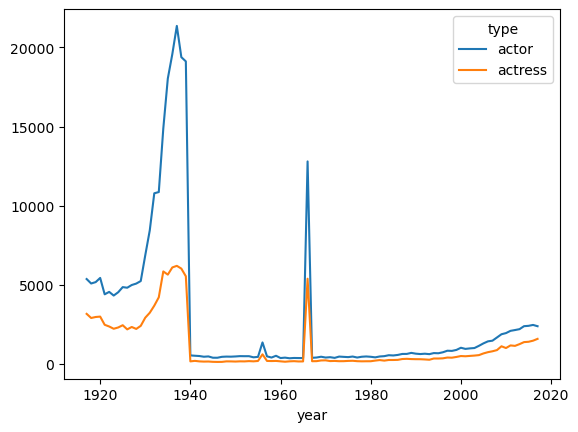

In [20]:
#timeplot2 = times2.pivot_table(index='year', columns='type', values='title', aggfunc='count')
# Necessary only if you have tinkered with the backend elsewhere.  matplotlib is the default backend.
#pd.options.plotting.backend = "matplotlib"
cast_past = cast[(cast['year']>=1917)&(cast['year']<=2017)]
ct_film_genders = pd.crosstab(cast_past['year'],cast_past['type'])
ct_film_genders.plot()

Here's the same plot on the full data plot using plotly (explained below).

In [178]:
pd.options.plotting.backend = "plotly"
ct_film_genders.plot()

Alternative solution using groupby:

In [54]:
# Count year/type group sizes.
# .unstack()  promotes types from second index component to columns.
# leaving year in index to serve as x-axis for plots
# roles_by_year is exactly the same DF as ct_film_genders.
roles_by_year = cast.groupby(['year', 'type']).size().unstack()
roles_by_year.plot(kind='line', y=['actor', 'actress'], title='Actor & Actress Roles By Year')


In [377]:
roles_by_year 

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN
...,...,...
2017,2372.0,1572.0
2018,549.0,701.0
2019,23.0,24.0


In [51]:
roles_by_year

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN
...,...,...
2017,2372.0,1572.0
2018,549.0,701.0
2019,23.0,24.0


#### Alternative path for the plot (using plotly commands directly)

Plotly commands: `plotly` is a plotting toolkit that 
is not standard with a `conda` installation.  However, it is installable with `conda install plotly` or,
in Colab, with `!pip install plotly`.  If you have `plotly`, it may be a good idea
to execute the following `pd.options` command in the cell importing `pandas` after `import pandas as pd`.

```
pd.options.plotting.backend = "plotly"
```

One appealing feature of `plotly` graphs is that they are interactive, even in a Jupyter notebook.
Try hovering your cursor over the plot below to make a toolbar (with pan, zoom, and save buttons) 
appear, or over points in the line to make coordinate information appear.   A more important point
is that `plotly`'s design has been guided by the "grammar of graphics" framework (not true
of `matplotlib`).  Arguably this makes the commands that expose its functionality more
intuitive.  At the very least it will feel more familiar to users of `R`'s `ggplot` command.

Even if you have `plotly` installed you might still prefer having the default `pandas` backend be
`matplotlib` (the default), using `plotly` on a case by case basis.  For example.
the plot above is very simple to reproduce using native `plotly` commands.

The commands can be simple because we are using the index for the x-axis and plotting one line
for each of our (two) columns; these are the `plotly` defaults when the first argument is a `DataFrame`.
They are the same defaults as with `DataFrame.plot()`.  We add the `markers=True` option to demonstrate a
little customization.

In [55]:
import plotly.express as px

# can add labels={'value':"Num roles"}
fig = px.line(roles_by_year,  markers=True)
fig.show()

### Plot the percentages of all roles that are female year by year for the century from 1917 through 2017

You are continuing your study of the imbalance of male and female roles.  Years on the x-axis,
one line tracking the percentage of female roles.

Comment:  This is  a very interesting plot, which is begging for a story to explain it.  The  truncated
data is making this plot slight inaccurate but the basic trend you're seeing is correct.

#### Truncated data

<AxesSubplot:title={'center':'Percentage of Female Roles by Year'}, xlabel='Year', ylabel='roles (% actress)'>

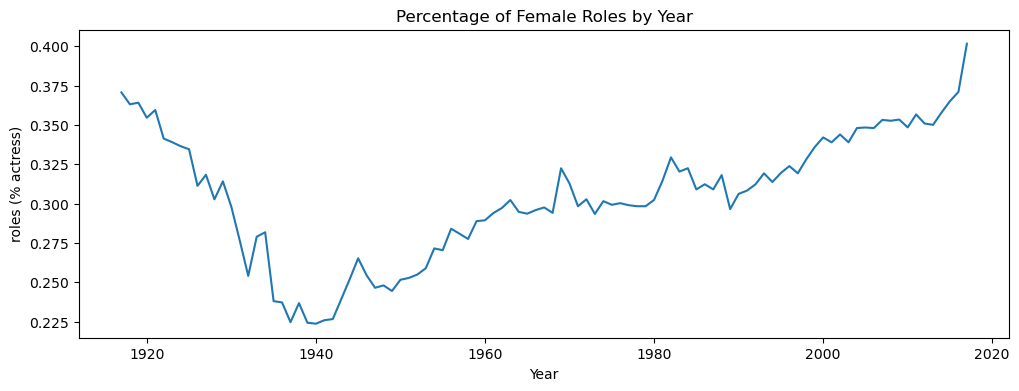

In [201]:
pd.options.plotting.backend = "matplotlib"

cast_1917_2017 = cast[(cast['year']<=2017)&(cast['year']>=1917)]
# normalize='index'|'column' gets us percentages instead of counts. normalize = 'index' computes the percentages
# relative to the summed values in a column.  normalize = 'columns' sums the rows.
ct_film_genders = pd.crosstab(cast_1917_2017['year'],cast_1917_2017['type'],normalize='index')
ct_film_genders['actress'].plot(ylabel='roles (% actress)',xlabel='Year',
                                title='Percentage of Female Roles by Year',figsize=(12,4))

#### Alternative equivalent solution #1

Do the cross tab the other way.

Whether `actress` is a row or column, plotting the `Series` object will work the same.

<AxesSubplot:title={'center':'Percentage of Female Roles by Year'}, xlabel='Year', ylabel='roles (% actress)'>

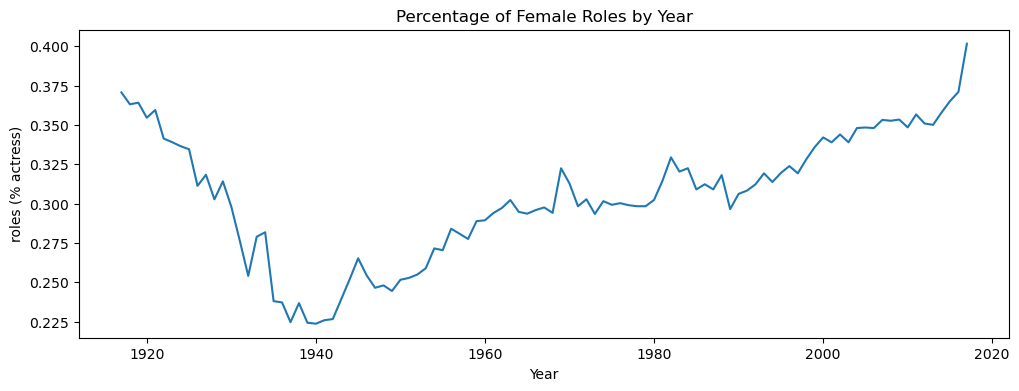

In [200]:
pd.options.plotting.backend = "matplotlib"

cast_1917_2017 = cast[(cast['year']>=1917) & (cast['year']<=2017)]

fem_roles_by_year=pd.crosstab(cast_1917_2017['type'], cast_1917_2017['year'],normalize='columns')
fem_proportion=fem_roles_by_year.loc['actress']
fem_proportion.plot(ylabel='roles (% actress)',xlabel='Year',
                    title='Percentage of Female Roles by Year',figsize=(12,4))

#### Alternative equivalent solution #2

The following solutions to the percentage plot are a little less simple but just as correct.  
Use `pivot_table` (and either `.count()` or, more easily, `.size()`).

In [87]:
# This is more naturally thought of as a cross tabulation.  But it can
# be done as pivot table by using aggfunc "count" and stipulating that the values
# in the" "character" column will be counted for  each year/type pair.
# If you dont provide "count" a values argument, you get a complicated multilevel column result
# where under each of the columns in cast (say "n"), get an actor/actress level with distinct counts
# Multicolumn DataFrame version
#pt17 = pd.pivot_table(cast_1917_2017,index='year',values='character', columns=['type'], aggfunc='count')
# One column DataFrame
#pt17 = pd.pivot_table(cast_1917_2017,index=['year','type'], values='character', aggfunc='count')

# Or with a pivot table to just count group sizes use aggfunc="size" .
# The type values can be made columns with .unstack() for more convenient plotting.
pt17 = pd.pivot_table(cast_1917_2017,index=['year','type'], aggfunc='size').unstack()
pt17[:10]

type,actor,actress
year,,
1917,5355,3153
1918,5073,2892
1919,5161,2955
1920,5425,2980
1921,4389,2463
1922,4543,2354
1923,4311,2211
1924,4520,2292
1925,4844,2435


This leaves the percentage-computing up to us.  We use `plotly`(not standard with a conda installation; installable with `conda install plotly` or, in Colab, with `!pip install plotly`).

In [184]:
import plotly.express as px

# The Series `percent` may -- but need not -- be made a column of `pt17`
percent = pt17['actress'] / (pt17['actor'] + pt17['actress'])
# If not a column, an axis label shd be supplied.
fig = px.line(pt17,  y=percent, labels={'y':"roles (% actress)"}) 
fig.show()

In [332]:
cast_up_to_2017 = cast[cast['year'] <= 2017]
cast_up_to_2017
# Pivot table counting roles by gender each year
gender_yearly = cast_up_to_2017.pivot_table(index='year', columns='type', aggfunc='size')

<AxesSubplot:xlabel='year'>

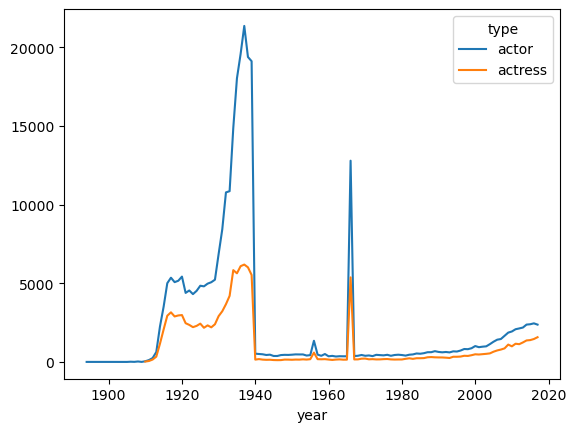

In [333]:
gender_yearly.plot()

### Appendix


#### Plotly demos

Plotly commands is a plotting toolkit that 
is not standard with a `conda` installation.  However, it is installable with `conda install plotly` or,
in Colab, with `!pip install plotly`.  If you have `plotly`, it may be a good idea
to execute the following `pd.options` command in the cell importing `pandas` after `import pandas as pd`.

```
pd.options.plotting.backend = "plotly"
```

One appealing feature of `plotly` graphs is that they are interactive, even in a Jupyter notebook.
Try hovering your cursor over the plot below to make a toolbar (with pan, zoom, and save buttons) 
appear, or over points in the line to make coordinate information appear.   A more important point
is that `plotly`'s design has been guided by the "grammar of graphics" framework (not true
of `matplotlib`).  Arguably this makes the commands that expose its functionality more
intuitive.  At the very least it will feel more familiar to users of `R`'s `ggplot` command.

Even if you have `plotly` installed you might still prefer having the default `pandas` backend be
`matplotlib` (the default), using `plotly` on a case by case basis.  For example.
the plot above is very simple to reproduce using native `plotly` commands.

The commands can be simple because we are using the index for the x-axis and plotting one line
for each of our (two) columns; these are the `plotly` defaults when the first argument is a `DataFrame`.
They are the same defaults as with `DataFrame.plot()`.  We add the `markers=True` option to demonstrate a
little customization.

A simple case using the iris data.  

In [339]:

import plotly.graph_objects as go
import plotly.express as px


df = px.data.iris() # replace with your own data source

fig = px.scatter(
                df, 
                x="sepal_width", 
                y="sepal_length", 
                color="species", 
                height=350)

fig.update_traces(
        marker_size=12,
        marker_line=dict(width=2, color="darkcyan"),
        #marker_line=dict(width=1, color="yellow"),
        selector=dict(mode='markers')
    )
fig

A lot of the visual organization of the scatterplot is achieved because the data bins the sepal widths and lengths into bins of width .1.  This creates some overlapping points in the y-direction, but this
is mostly visually interpretable.  

In [335]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


Let's try the same plot with with smaller markers, a little more height, and black boundaries for
the color filled markers.

In [347]:
fig = px.scatter(
                df, 
                x="sepal_width", 
                y="sepal_length", 
                color="species", 
                height=375)

fig.update_traces(
        marker_size=8,
        marker_line=dict(width=2, color="black"),
        #marker_line=dict(width=1, color="yellow"),
        selector=dict(mode='markers')
    )
fig

#### Actors and actresses revisited.  A plotting challenge

The number of films made each year peaked a little before World War II and took quite some time
to recover.  Problem:  Track film growth along with percentage of female roles.  An interesting
visual challenge.  You may want to try that on your own before reading the spoilers below.   The idea
is to show that the percentage of female roles remained essentially stable even as the
film industry went through explosive growth in the Post-war eRA.

The visual challenge is that the numbers of interest (percentage of actress roles and number of films
made) are on different scales.  

Here is the data to be plotted.

Plotting solutions below. One with plotly, one without.

In [208]:
import numpy as np
import matplotlib.pyplot as plt

#cast_past = cast[cast['year'].between(1917,2017)]
cast_past = cast[cast['year'].between(1917,2000)]

ct_film_genders = pd.crosstab(cast_past['year'],cast_past['type'],normalize='index')
# Pivot table with film industry growth
film_growth = pd.pivot_table(cast_past,index = 'year',values='title',aggfunc='count')

It's not continuous growth.  There's a significant drop during the war, then steady growth
afterward.

In [209]:
film_growth[20:30]

,title
year,
1937,27551
1938,25401
1939,24648
1940,674
1941,686
1942,635
1943,577
1944,602
1945,499


Without plotly.

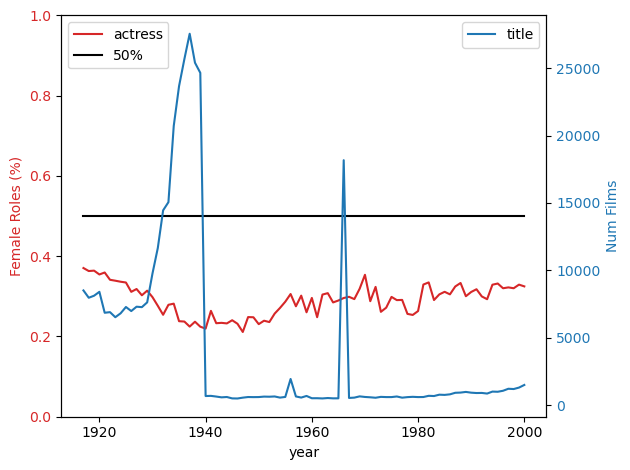

In [210]:
fig, ax0 = plt.subplots()

##############   R e d      L i n e   ################################
color = 'tab:red'

# Get a better sense of the size of the percent shifts with ylim=[0,1]
ct_film_genders['actress'].plot(ax=ax0, color=color,ylim=[0,1])
ax0.plot(ct_film_genders.index,.5+np.zeros(len(ct_film_genders)),color='k',label="50%")
ax0.set_ylabel('Female Roles (%)', color=color)
ax0.tick_params(axis='y', labelcolor=color)
ax0.legend(loc='upper left')

##############   B l u e     L i n e   ################################
color = 'tab:blue'

ax1 = ax0.twinx()  # instantiate a second set of axes that shares the same x-axis

ax1.set_ylabel("Num Films", color=color)  
film_growth.plot(ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)

ax1.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.show()

A more complicated plotly example recreating the graph above with percent actresses and number of fims using
the full cast dataset.

This example illustrates the hierarchical (or tree) structure of plotly graphics specs.  For example,
within the marker spec on the actress (%) scatter, there is a dictionary specifying the line properties for the outline of the marker circle.

In [43]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np

cast_past = cast[cast['year'].between(1917,2000)]

ct_film_genders = pd.crosstab(cast_past['year'],cast_past['type'],normalize='index')
film_growth = pd.pivot_table(cast_past,index = 'year',values='title',aggfunc='count')

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Prepare the data for the 50% line
fifty_percent = .5*np.ones((len(ct_film_genders),))


# Add "traces" one by one.  Each first argument of fig.add_trace() is a graphic object

# The actress % line
fig.add_trace(
    go.Scatter(x=ct_film_genders.index,
               y=ct_film_genders['actress'],
               name = "actress %",
               mode="markers+lines",
               line = dict(width=2,
                           color='cyan'),
               marker=dict(size=6,
                          line=dict(width=2,
                                    color='DarkSlateGrey'))
              ),
    secondary_y=False
)

# The 50% line

fig.add_trace(
    go.Scatter(x=ct_film_genders.index, 
               y=fifty_percent,
               opacity=0.8,
               line= dict(color="darkcyan",
                          ),
               name="50%"),
    secondary_y=False
)

# The films made line

fig.add_trace(
    go.Scatter(x=film_growth.index,
               y=film_growth['title'],
               line = dict(color='firebrick'),
               name="films made"
               #mode="lines" #This is the default scatter mode
              ), 
    secondary_y=True,
)


# Set x-axis title
fig.update_xaxes(title_text="year")

# Set y-axes titles
fig.update_yaxes(title_text="actress (%)", secondary_y=False)
fig.update_yaxes(title_text="films", secondary_y=True)

# Update one/a few aspect(s) of layout: e.g., Add figure title
#fig.update_layout(
#    title_text="Actress Roles and Films by Year"
#)

# Create layout specs
layout =  dict(title_text ="Actress Roles and Films by Year",
               yaxis=dict(showline=True,
                          showticklabels=True,
                          ticks="outside",
                          tickcolor="darkcyan",
                          tickfont=dict(color="darkcyan"),
                          range=[0, 1.0]),
               yaxis2=dict(showline=True,
                           showticklabels=True,
                           ticks="inside",
                           linecolor='rgba(204, 52, 102, 0.8)', # crds 0-2: rgb vals; crd 3: alpha (opacity)
                           linewidth=1))

# Do the update
fig['layout'].update(layout)
#  No need to do fig.show() in a Jupyter NB. A plotly fig knows how to display itself
fig

####  Comment repository

Here's where I store some of the comments used on your answers.

> Issue with this answer.  See the solution.

> Remakes not accounted for.